<a href="https://colab.research.google.com/github/Dylan-Geraci/ParkSafe-LA/blob/main/notebooks/modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Training – ParkSafe-LA

This notebook trains a binary classifier to predict parking citation risk (low vs high) based on ZIP code, hour of day, and day of the week.

## Import Libraries

Import necessary libraries for data handling, model training, evaluation, and saving the trained model.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import GridSearchCV

## Model Preperation

In [ ]:
file_path_final_df = '/content/drive/My Drive/machine-learning/park-safe-la/data/Grouped_df.csv'
df = pd.read_csv(file_path_final_df)

df.sample(10)

,day_of_week,ticket_count,hour_sin,hour_cos,zip_90001,zip_90002,zip_90003,zip_90004,zip_90005,zip_90006,...,zip_91748,zip_91765,zip_91767,zip_91768,zip_91769,zip_91776,zip_91793,zip_91803,zip_other,risk_level
443961,Thursday,1,-0.866025,-0.500000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,low
3738919,Wednesday,1,0.500000,0.866025,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,low
30639,Monday,6,0.707107,-0.707107,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,high
2144818,Sunday,4,-0.258819,0.965926,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,high
3257432,Friday,2,0.965926,-0.258819,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,low
1449568,Saturday,2,-0.500000,-0.866025,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,low
3724948,Monday,5,-0.965926,0.258819,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,high
3078605,Tuesday,2,0.866025,-0.500000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,low
1317262,Wednesday,3,-0.866025,-0.500000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,low
2889112,Tuesday,1,-0.500000,0.866025,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,low


Encode categorical labels:

In [ ]:
le_risk = LabelEncoder()
df['risk_label'] = le_risk.fit_transform(df['risk_level'])

le_day = LabelEncoder()
df['day_of_week'] = le_day.fit_transform(df['day_of_week'])

print(f"Risk labels: {le_risk.classes_}")
print(f"Day labels: {le_day.classes_}")

Risk labels: ['high' 'low']
Day labels: ['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']


Separate features and labels, then split into train/test sets:

In [ ]:
X = df.drop(columns=['risk_level', 'risk_label', 'ticket_count'])
y = df['risk_label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Model Execution

Random Forest classifier:

In [ ]:
model = RandomForestClassifier(n_estimators=100, max_depth=15, class_weight='balanced', random_state=42)

model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15, random_state=42)

Evaluate the model:

In [ ]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=le_risk.classes_))

              precision    recall  f1-score   support

        high       0.60      0.64      0.62    336510
         low       0.72      0.69      0.71    464813

    accuracy                           0.67    801323
   macro avg       0.66      0.66      0.66    801323
weighted avg       0.67      0.67      0.67    801323



Confusion matrix to see prediction split:

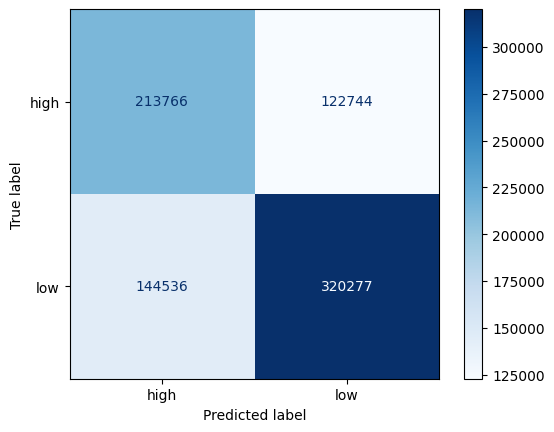

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_risk.classes_)
disp.plot(cmap='Blues')

Plot the top 15 features contributing to the model's predictions:

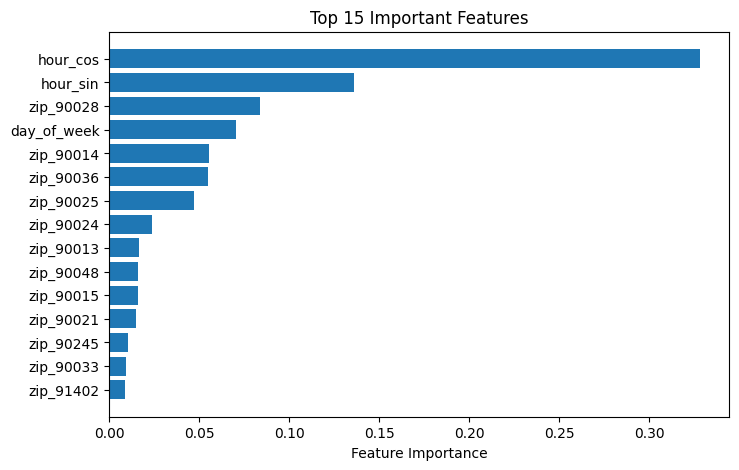

In [ ]:
importances = model.feature_importances_
feature_names = X.columns

top_indices = importances.argsort()[::-1][:15]
plt.figure(figsize=(8, 5))
plt.barh(range(len(top_indices)), importances[top_indices], align='center')
plt.yticks(range(len(top_indices)), [feature_names[i] for i in top_indices])
plt.xlabel("Feature Importance")
plt.title("Top 15 Important Features")
plt.gca().invert_yaxis()
plt.show()

## Exporting The Model

In [ ]:
#joblib.dump(model, 'parksafe_model.pkl')

['parksafe_model.pkl']